In [40]:
# !pip install lyricsgenius

In [19]:
import lyricsgenius
import pandas as pd
import matplotlib.pyplot as plt
import time
import re
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Attach genius API
api_key = ###
genius=lyricsgenius.Genius(api_key)
genius.timeout=60
genius.skip_non_songs = True
genius.excluded_terms = ["(Remix)", "(Live)"]
genius.remove_section_headers = True

#Create a dictionary of Ariana Grande album names, their release years and songs included in each album
albums = {
    'Yours Truly': {
        'songs': [
            'Honeymoon Avenue',
            'Baby I',
            'Right There',
            'Tattooed Heart',
            'Lovin\' It',
            'Piano',
            'Daydreamin\'',
            'The Way',
            'You\'ll Never Know',
            'Almost Is Never Enough',
            'Popular Song',
            'Better Left Unsaid'
        ],
        'year': 2013
    },
    'My Everything': {
        'songs': [
            'Intro',
            'Problem',
            'One Last Time',
            'Why Try',
            'Break Free',
            'Best Mistake',
            'Be My Baby',
            'Bang Bang',
            'Hands On Me',
            'My Everything',
            'Only 1',
            'You Don\'t Know Me'
        ],
        'year': 2014
    },
    'Dangerous Woman': {
        'songs': [
            'Moonlight',
            'Dangerous Woman',
            'Be Alright',
            'Into You',
            'Side to Side',
            'Let Me Love You',
            'Greedy',
            'Leave Me Lonely',
            'Everyday',
            'Sometimes',
            'I Don\'t Care',
            'Bad Decisions',
            'Touch It',
            'Knew Better / Forever Boy'
        ],
        'year': 2016
    },
    'Sweetener': {
        'songs': [
            'raindrops (an angel cried)',
            'blazed',
            'the light is coming',
            'R.E.M',
            'god is a woman',
            'sweetener',
            'successful',
            'everytime',
            'breathin',
            'no tears left to cry',
            'borderline',
            'better off',
            'goodnight n go',
            'pete davidson',
            'get well soon'
        ],
        'year': 2018
    },
    'Thank U, Next': {
        'songs': [
            'imagine',
            'needy',
            'NASA',
            'bloodline',
            'fake smile',
            'bad idea',
            'make up',
            'ghostin',
            'in my head',
            '7 rings',
            'thank u, next',
            'break up with your girlfriend, i\'m bored'
        ],
        'year': 2018
    },
    'Positions': {
        'songs': [
            'shut up',
            '34+35',
            'motive',
            'just like magic',
            'off the table',
            'six thirty',
            'safety net',
            'my hair',
            'nasty',
            'west side',
            'love language',
            'positions',
            'obvious',
            'pov'
        ],
        'year': 2020
    },
    "Charlie’s Angels (Original Motion Picture Soundtrack)": {
        'songs': [
            'Don\'t Call Me Angel',
            'Bad to You',
            'How I Look on You',
            'Nobody',
            'Got Her Own'
        ],
        'year': 2019
    },
    'Eternal Sunshine': {
        'songs': [
            'intro (end of the world)',
            'bye',
            'don\'t wanna break up again',
            'saturn returns interlude',
            'eternal sunshine',
            'supernatural',
            'true story',
            'the boy is mine',
            'yes, and?',
            'we can\'t be friends (wait for your love)',
            'i wish i hated you',
            'imperfect for you',
            'ordinary things'
        ],
        'year': 2024
    }
}

In [43]:
# #Test a single song to see if song retrieval using the api is successful
# search = genius.search_song("No Tears Left to Cry", "Ariana Grande")
# if search:
#     print(f"Search result type: {type(search)}")
#     if hasattr(search, 'id'):
#         song_id = search.id
#         print(f"Found song ID: {song_id}")
#         lyrics = genius.lyrics(song_id=song_id)
#         if lyrics:
#             print(f"Lyrics: {lyrics[:200]}...")
#             print(f"Count of 'yeah/yea/ya': {len(re.findall(r'\b(yeah|yea|ya)\b', lyrics.lower()))}")
#         else:
#             print("No lyrics retrieved")
#     else:
#         print("No song ID found, search might return multiple results or None")
# else:
#     print("Song not found")

In [5]:
#Count 'yuh'/'yeah' in albums
def count_yuh_in_album(album_data, max_retries=3):
    retries = 0
    while retries < max_retries:
        try:
            album_name = album_data["songs"][0]  # Use first song as album identifier for logging
            print(f"Attempting to process album {album_name}...")
            yuh_count = 0
            for song_title in album_data["songs"]:
                print(f"Searching for {song_title} by Ariana Grande...")
                search = genius.search_song(song_title, "Ariana Grande")
                if search and hasattr(search, 'id'):
                    song_id = search.id
                    print(f"Found {song_title} with ID: {song_id}")
                    lyrics = genius.lyrics(song_id=song_id)
                    if lyrics:
                        print(f"Lyrics found for {song_title}: {lyrics[:200]}...")
                        lyrics_lower = lyrics.lower()
                        yeah_count = len(re.findall(r'\b(yeah|yea|ya)\b', lyrics_lower))
                        print(f"Counted {yeah_count} 'yeah/yea/ya' in {song_title}")
                        yuh_count += yeah_count
                    else:
                        print(f"No lyrics found for {song_title} (ID: {song_id})")
                else:
                    print(f"No song found for {song_title}")
            print(f"Completed {album_name} with {yuh_count} 'yeah/yea/ya' counts")
            return yuh_count
        except Exception as e:
            print(f"Attempt {retries + 1} failed for {album_name}: {e}")
            retries += 1
            if retries < max_retries:
                time.sleep(5)
            else:
                print(f"Error processing {album_name} after {max_retries} retries: {e}")
                return 0

data = {'Album': [], 'Release_Year': [], 'Yuh_Count': []}
for album_name, album_data in albums.items():
    yuh_count = count_yuh_in_album(album_data)
    data['Album'].append(album_name)
    data['Release_Year'].append(album_data["year"])
    data['Yuh_Count'].append(yuh_count)
    time.sleep(5)

df = pd.DataFrame(data)
print("Number of 'yeah/yea/ya' per album:")
print(df[['Album', 'Yuh_Count']])

Attempting to process album Honeymoon Avenue...
Searching for Honeymoon Avenue by Ariana Grande...
Searching for "Honeymoon Avenue" by Ariana Grande...


C:\Users\arthu\anaconda3\Lib\site-packages\lyricsgenius\genius.py:482: FutureWarning: The constructor signature will change in a future version. It will change to Song(lyrics, body) instead of Song(client, json_dict, lyrics).
  song = Song(self, song_info, lyrics)


Done.
Found Honeymoon Avenue with ID: 119682
Lyrics found for Honeymoon Avenue: Shoo-doo-doo-dum-doo, da-da
Shoo-doo-doo-dum-doo, da-da
Sha-ba-da, sha-ba-da
(
Da-da
) Uh-uh
(
Da-da
) Ooh, yeah
(
Da-da
) Mmm, ah
(
Da-da
) 
It's the Rascals

I looked in my rearview mirror and
It se...
Counted 3 'yeah/yea/ya' in Honeymoon Avenue
Searching for Baby I by Ariana Grande...
Searching for "Baby I" by Ariana Grande...
Done.
Found Baby I with ID: 192859
Lyrics found for Baby I: Baby, I got love for thee so deep inside of me
I don't know where to start (Yeah, yeah, yeah, yeah, yeah)
Yeah, yeah (Yeah, yeah, yeah, yeah, yeah, yeah, yeah)
I love you more than anything
But the wo...
Counted 52 'yeah/yea/ya' in Baby I
Searching for Right There by Ariana Grande...
Searching for "Right There" by Ariana Grande...
Done.
Found Right There with ID: 201561
Lyrics found for Right There: Ooh-ooh, hey
(If you wanna party, if you, if you wanna party)
Put your hands up (Put your hands up), ooh, yeah
(If you, if yo

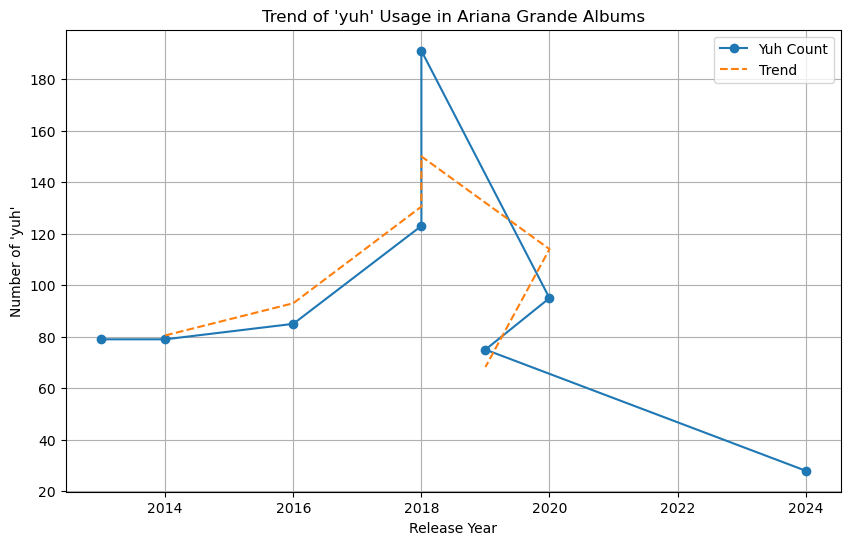

In [6]:
#Time series analysis
df.set_index('Release_Year', inplace=True)

decomposition = seasonal_decompose(df['Yuh_Count'], model='additive', period=2)
trend = decomposition.trend

#Plot the data and trend
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Yuh_Count'], label='Yuh Count', marker='o')
plt.plot(trend.index, trend, label='Trend', linestyle='--')
plt.title("Trend of 'yuh' Usage in Ariana Grande Albums")
plt.xlabel("Release Year")
plt.ylabel("Number of 'yuh'")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
#Analyze drop point
trend_diff = df['Yuh_Count'].diff()
drop_year = df.index[trend_diff < 0].min() if not trend_diff[trend_diff < 0].empty else None
if drop_year:
    print(f"\nUsage of 'yuh' started reducing significantly around {drop_year}")
else:
    print("\nNo significant drop detected in the data.")


Usage of 'yuh' started reducing significantly around 2019-01-01 00:00:00


In [10]:
#Identify top 5 songs with "yuh"
song_data = []

for album_name, album_data in albums.items():
    try:
        print(f"Processing album: {album_name}")
        for song_title in album_data['songs']:
            print(f"Searching for {song_title} by Ariana Grande...")
            search = genius.search_song(song_title, "Ariana Grande")
            if search and hasattr(search, 'id'):
                song_id = search.id
                print(f"Found {song_title} with ID: {song_id}")
                lyrics = genius.lyrics(song_id=song_id)
                if lyrics:
                    print(f"Lyrics found for {song_title}: {lyrics[:200]}...")
                    lyrics_lower = lyrics.lower()
                    yuh_count = len(re.findall(r'\b(yeah|yea|ya)\b', lyrics_lower))
                    if yuh_count > 0:  # Optional: Only append if count > 0
                        song_data.append({
                            'Song': song_title,
                            'Album': album_name,
                            'Yuh_Count': yuh_count
                        })
                else:
                    print(f"No lyrics found for {song_title} (ID: {song_id})")
            else:
                print(f"No song found for {song_title}")
    except Exception as e:
        print(f"Error processing songs for {album_name}: {e}")

song_df = pd.DataFrame(song_data)
top_5_songs = song_df.sort_values(by='Yuh_Count', ascending=False).head(5)
print("\nTop 5 songs with 'yuh':")
print(top_5_songs[['Song', 'Album', 'Yuh_Count']])

Processing album: Yours Truly
Searching for Honeymoon Avenue by Ariana Grande...
Searching for "Honeymoon Avenue" by Ariana Grande...


C:\Users\arthu\anaconda3\Lib\site-packages\lyricsgenius\genius.py:482: FutureWarning: The constructor signature will change in a future version. It will change to Song(lyrics, body) instead of Song(client, json_dict, lyrics).
  song = Song(self, song_info, lyrics)


Done.
Found Honeymoon Avenue with ID: 119682
Lyrics found for Honeymoon Avenue: Shoo-doo-doo-dum-doo, da-da
Shoo-doo-doo-dum-doo, da-da
Sha-ba-da, sha-ba-da
(
Da-da
) Uh-uh
(
Da-da
) Ooh, yeah
(
Da-da
) Mmm, ah
(
Da-da
) 
It's the Rascals

I looked in my rearview mirror and
It se...
Searching for Baby I by Ariana Grande...
Searching for "Baby I" by Ariana Grande...
Done.
Found Baby I with ID: 192859
Lyrics found for Baby I: Baby, I got love for thee so deep inside of me
I don't know where to start (Yeah, yeah, yeah, yeah, yeah)
Yeah, yeah (Yeah, yeah, yeah, yeah, yeah, yeah, yeah)
I love you more than anything
But the wo...
Searching for Right There by Ariana Grande...
Searching for "Right There" by Ariana Grande...
Done.
Found Right There with ID: 201561
Lyrics found for Right There: Ooh-ooh, hey
(If you wanna party, if you, if you wanna party)
Put your hands up (Put your hands up), ooh, yeah
(If you, if you wanna party, if you, if you wanna party)
So put your hands up (Put your h...


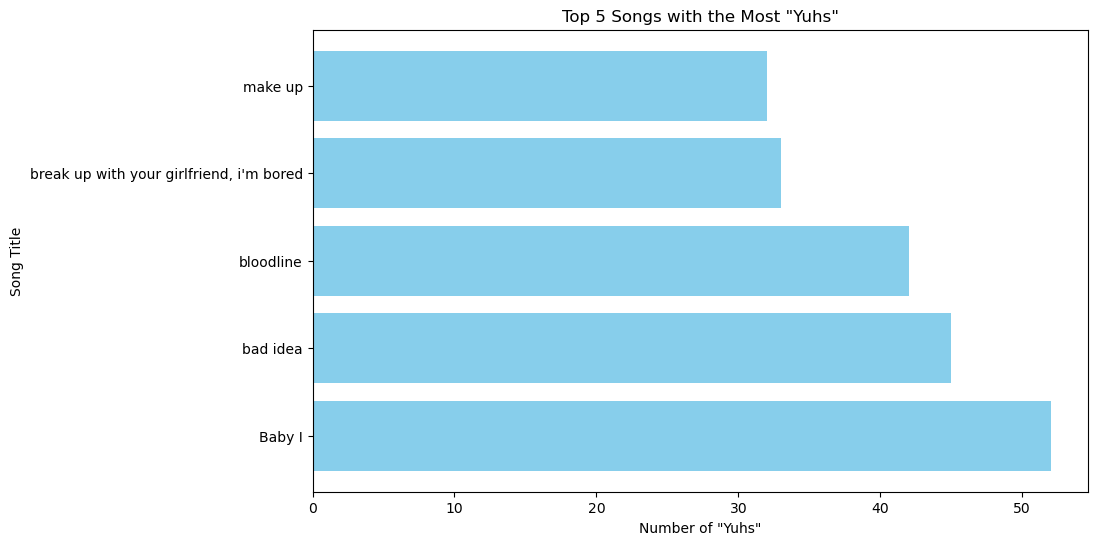

In [47]:
#Create bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_5_songs['Song'], top_5_songs['Yuh_Count'], color='skyblue')
plt.xlabel('Number of "Yuhs"')
plt.ylabel('Song Title')
plt.title('Top 5 Songs with the Most "Yuhs"')
plt.show()

In [24]:
#Forecast and detect drop using ARIAMA
df=pd.DataFrame(data)
df = df.groupby('Release_Year').agg({'Yuh_Count': 'sum'}).reset_index()
df['Release_Year'] = pd.to_datetime(df['Release_Year'], format='%Y')
df.set_index('Release_Year', inplace=True)

#Check stationarity
result = adfuller(df['Yuh_Count'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] > 0.05 and len(df) > 1:
    print("Series is non-stationary, applying differencing")
    df['Yuh_Count_Diff'] = df['Yuh_Count'].diff()
    df = df.dropna()  # Drop the NaN from the first differenced value
    model = ARIMA(df['Yuh_Count_Diff'], order=(1, 1, 1))
else:
    model = ARIMA(df['Yuh_Count'], order=(1, 1, 1))

#Fit the model
results = model.fit()
print(results.summary())

ADF Statistic: -2.2816393841796536
p-value: 0.17795802706966668
Series is non-stationary, applying differencing
                               SARIMAX Results                                
Dep. Variable:         Yuh_Count_Diff   No. Observations:                    6
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -40.293
Date:                Tue, 29 Jul 2025   AIC                             86.585
Time:                        21:43:52   BIC                             85.414
Sample:                             0   HQIC                            83.441
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5177      0.115     -4.505      0.000      -0.743      -0.292
ma.L1         -0.99

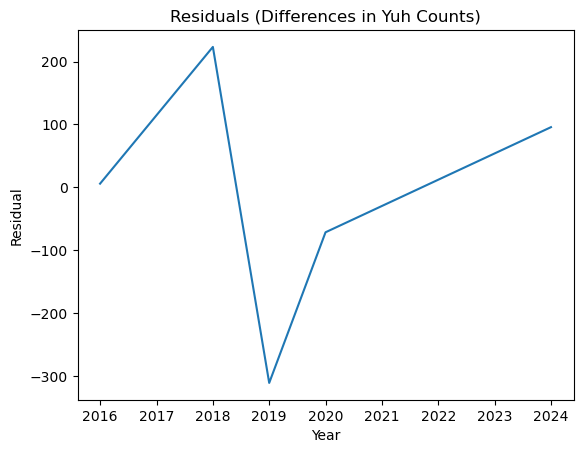

In [48]:
#Plot residuals
plt.plot(df.index, results.resid)
plt.title('Residuals (Differences in Yuh Counts)')
plt.xlabel('Year')
plt.ylabel('Residual')
plt.show()

In [45]:
#Forecast next few years
last_count = df['Yuh_Count'].iloc[-1]
forecast_diff = results.forecast(steps=2)
forecast_total = [last_count]
for diff in forecast_diff:
    forecast_total.append(forecast_total[-1] + diff)
forecast_years = pd.date_range(start=df.index[-1], periods=3, freq='Y')[1:]
forecast_df = pd.Series(forecast_total[1:], index=forecast_years, name='predicted_mean')

print("\nForecasted 'yuh' count for next 2 years:")
print(forecast_df)


Forecasted 'yuh' count for next 2 years:
2025-12-31    22.395132
2026-12-31   -26.535739
Freq: YE-DEC, Name: predicted_mean, dtype: float64


In [44]:
#Forecast next few years
last_count = df['Yuh_Count'].iloc[-1]
forecast_diff = results.forecast(steps=2)
forecast_diff = forecast_diff.clip(lower=0)
forecast_total = [last_count]
for diff in forecast_diff:
    forecast_total.append(forecast_total[-1] + diff)
forecast_years = pd.date_range(start=df.index[-1], periods=3, freq='Y')[1:]
forecast_df = pd.Series(forecast_total[1:], index=forecast_years, name='predicted_mean')

print("\nForecasted 'yuh' count for next 2 years:")
print(forecast_df)


Forecasted 'yuh' count for next 2 years:
2025-12-31    28.0
2026-12-31    28.0
Freq: YE-DEC, Name: predicted_mean, dtype: float64
